# House Price Prediction using Linear Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
df = pd.read_csv('Housing (1).csv')

print("🔹 Dataset Loaded Successfully")
print(df.head())
print(df.info())

🔹 Dataset Loaded Successfully
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 5

In [7]:
print("\n Missing Values:")
print(df.isnull().sum())  # dataset has no missing values

print("\n Statistical Summary:")
print(df.describe())



 Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

  

## FEATURE SELECTION & ENCODING

In [9]:

# Target variable (y) and features (X)
X = df.drop("price", axis=1)  # independent variables
y = df["price"]               # dependent variable

# Identify categorical features
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n🔧 Categorical Columns:", categorical_cols)
print("🔧 Numeric Columns:", numeric_cols)

# One-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

X_encoded = preprocessor.fit_transform(X)

print("\n🎯 Feature matrix after encoding shape:", X_encoded.shape)




🔧 Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
🔧 Numeric Columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

🎯 Feature matrix after encoding shape: (545, 13)


## TRAIN — TEST SPLIT

In [16]:

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("\n Training Set Size:", X_train.shape)
print(" Test Set Size:", X_test.shape)


 Training Set Size: (436, 13)
 Test Set Size: (109, 13)


## MODEL TRAINING (LINEAR REGRESSION)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\n Model Training Completed!")


 Model Training Completed!


## MODEL EVALUATION

In [20]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n MODEL PERFORMANCE METRICS")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


 MODEL PERFORMANCE METRICS
R² Score: 0.6529
Mean Squared Error (MSE): 1754318687330.68
Root Mean Squared Error (RMSE): 1324506.96
Mean Absolute Error (MAE): 970043.40


##  VISUALIZATION — ACTUAL vs PREDICTED PRICES

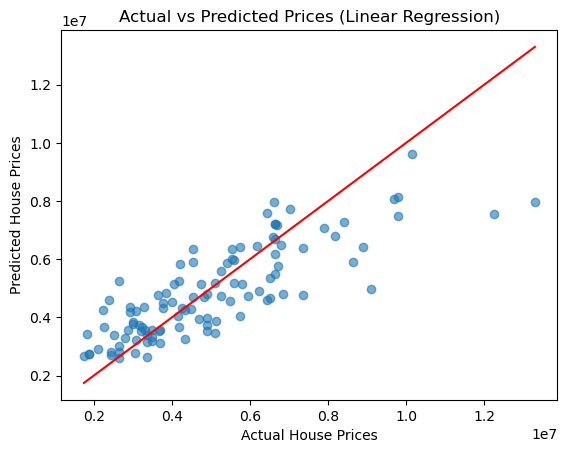


 PROJECT COMPLETED SUCCESSFULLY 


In [23]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")  # reference line
plt.show()

print("\n PROJECT COMPLETED SUCCESSFULLY ")

# The End